In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Calculate the self part of the Van Hove correlation function $G_s (r, t)$ at time 0 and $t^*$:
$$
  G_s (r, t_*) =  \frac{1}{N} \sum_{i=1}^{N} \delta [r - |r_i (t_*) - r_i (0)|] 
$$

In [2]:
def dpart_func(frame0, frame_zv):
    
    dpart = []
    
    for part in frame0['particle']:
        
        if (part in frame_zv['particle'].unique()):
            mask0 = frame0['particle'] == part
            x0 = frame0[mask0]['x'].item()
            y0 = frame0[mask0]['y'].item()

            mask_zv = frame_zv['particle'] == part
            x_zv = frame_zv[mask_zv]['x'].item()
            y_zv = frame_zv[mask_zv]['y'].item()

            dpart.append( abs(np.sqrt(x_zv*x_zv + y_zv*y_zv) - np.sqrt(x0*x0 + y0*y0)) )
    
    
    return dpart
    

In [3]:
# def Gs_func(dpart, bins, r_max):    

#     # Histogram the radial distances
#     r_values, bin_edges = np.histogram(dpart, bins=bins, range=(0, r_max), density=True)
    
#     # Calculate the midpoints of the bins
#     r_values_mid = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    
#     return r_values_mid, r_values

In [4]:
def Gs_mult_func(r_values, gs_values):
    
    
    return 4 * np.pi * r_values**2 * gs_values

In [5]:
def aver_func(dpart, r, dr):
    
    G_s = np.zeros_like(r)
    
    N = len(dpart)
    
    for i, r_val in enumerate(r):
        
        count = np.sum((dpart >= r_val) & (dpart < r_val + dr))

        G_s[i] = count / N 
    
    return G_s

In [6]:
# file_name_prefix = '2_4000_6000'

In [7]:
def read_data():
    
    file_path = f'data_out/backup/S6T18_t_corrected.csv'
    
    usecols = ['y', 'x', 'frame', 'particle']
    
    data = pd.read_csv(file_path, usecols=usecols)
    
    
    return data

In [8]:
%%time


data = read_data()
# print(data.head())
data_frame0 = data[data['frame'] == 0]
max_frame = data['frame'].values[-1] + 1
frame_zv = 5500 # t*


r = np.arange(0, 30, 0.0001)
dr = r[1] - r[0]


f0 = data[data['frame'] == 0]
f_zv = data[data['frame'] == frame_zv]


dpart = dpart_func(f0, f_zv)
Gs = aver_func(dpart, r, dr)
Gs_mult = Gs_mult_func(r, Gs)

# r_max = 30
# bins = 300000

# dpart = dpart_func(f0, f_zv)
# # Calculate Gs(r, t)
# r, Gs = Gs_func(dpart, bins, r_max)

# # Calculate 4 * pi * r^2 * Gs(r, t)
# Gs_mult = Gs_mult_func(r, Gs)


CPU times: user 2.54 s, sys: 26.1 ms, total: 2.56 s
Wall time: 2.58 s


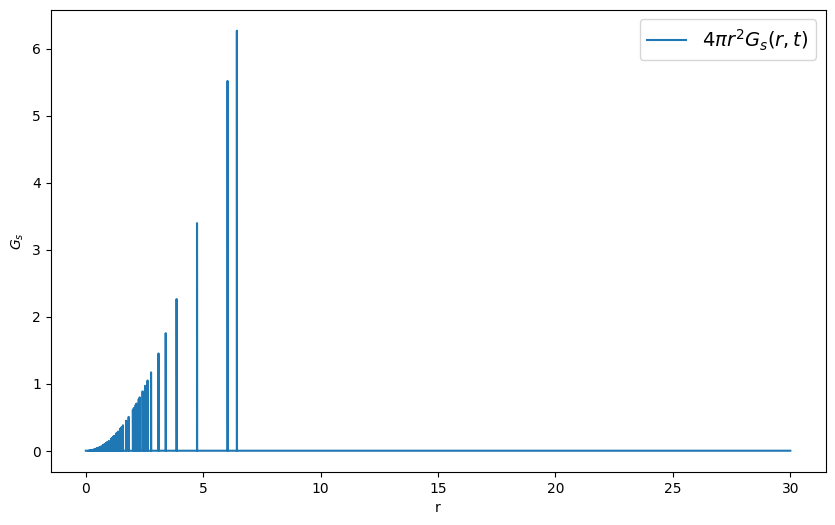

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(r, Gs_mult, label=r'$4\pi r^2 G_s(r, t)$')

ax.set(ylabel=r'$G_s$',
      xlabel='r')

plt.legend (fontsize=14)

In [10]:
# # write to file Gs
# DIR = f'data_out/Gs/'

# file_Gs = DIR + f'{frame_zv}.dat'

# data_out_dict = {"r[px]": r, "Gs": Gs}

# data_out = pd.DataFrame(data_out_dict)

# data_out.to_csv(file_Gs, index=False)

In [11]:
# Gaussian approximation of MSD

def Gauss_MSD(dpart, r):
    
    delta_r = np.mean( [x*x for x in dpart] )
    
    G0 = np.zeros_like(r)
    
    for i, r_val in enumerate(r):

        G0[i] = (1./(np.pi*delta_r)) * np.exp( -r_val**2 / delta_r )
    
    
    return G0

In [12]:
# # convert to microns

# px_to_micron = 0.06905

# r_micron = [i * px_to_micron for i in r]

In [13]:
G0 = Gauss_MSD(dpart, r)
print(G0)

[1.02564037e-001 1.02564036e-001 1.02564035e-001 ... 1.17804591e-127
 1.17577063e-127 1.17349973e-127]


In [14]:
# Gs_mult = np.zeros_like(r)
# G0_mult = np.zeros_like(r)

# for i, r_val in enumerate(r_micron):
    
#     mult_s = 4*np.pi*r_val**2 #2*np.pi*r_val**2
#     mult_0 = 4*np.pi*r_val**2 #2*np.pi*r_val**2 #2 * np.pi * r_val**2 #4. * np.pi*r_val*r_val
    
#     Gs_mult[i] = mult_s * Gs[i]
#     G0_mult[i] = mult_0 * G0[i]
    
# print(Gs_mult)

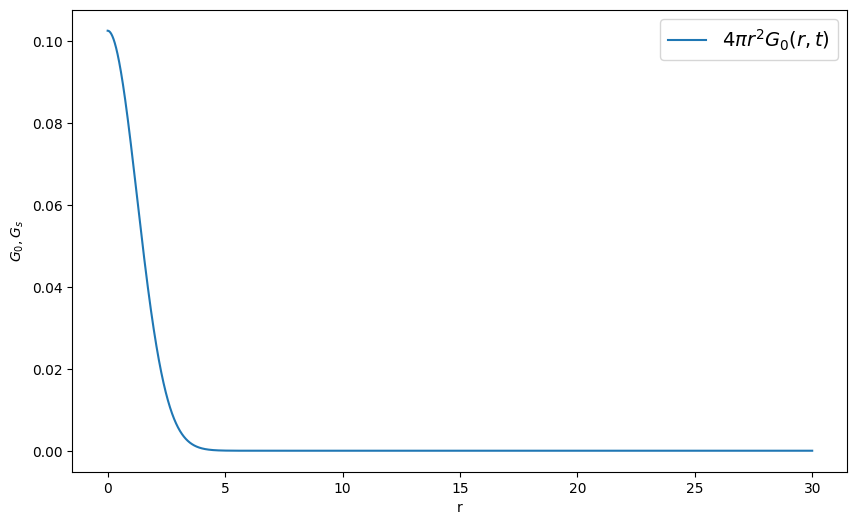

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

# plt.plot(r_micron, Gs_mult, label=r'$4\pi r^2 G_s(r, t)$')
plt.plot(r, G0, label=r'$4\pi r^2 G_0(r, t)$')

ax.set(ylabel=r'$G_0, G_s$',
      xlabel='r')
# ax.set_xscale('log')
# ax.set_yscale('log')
plt.legend (fontsize=14)

In [16]:
# write to file G0

DIR = f'data_out/G0/'

file_Gs = DIR + f'{frame_zv}.dat'

data_out_dict = {"r[px]": r, "G0[1/px^2]": G0}

data_out = pd.DataFrame(data_out_dict)

data_out.to_csv(file_Gs, index=False)